In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from datasets.data_import import get_capgmyo_dataset, get_csl_dataset, get_absolute_path, extract_data, get_ninapro_dataset, get_capgmyo_tensor, get_ninapro_tensor, get_csl_tensor, save_arrays
import scipy.io
import numpy as np
import os
import torch
from torch.utils.data import DataLoader
from math import ceil
from datasets.abstract_data_module import AbstractDataModule
from train import main

In [2]:
save_arrays(get_capgmyo_dataset(), 'CapgMyo', os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'Data'))

,path,label
0,C:\Science\Data\CapgMyo\0\CapgMyo_0.npy,0
1,C:\Science\Data\CapgMyo\0\CapgMyo_1.npy,0
2,C:\Science\Data\CapgMyo\0\CapgMyo_2.npy,0
3,C:\Science\Data\CapgMyo\0\CapgMyo_3.npy,0
4,C:\Science\Data\CapgMyo\0\CapgMyo_4.npy,0
...,...,...
1439995,C:\Science\Data\CapgMyo\7\CapgMyo_1439995.npy,7
1439996,C:\Science\Data\CapgMyo\7\CapgMyo_1439996.npy,7
1439997,C:\Science\Data\CapgMyo\7\CapgMyo_1439997.npy,7
1439998,C:\Science\Data\CapgMyo\7\CapgMyo_1439998.npy,7


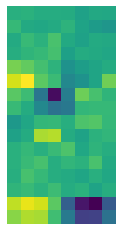

In [17]:
from scipy.signal import butter, lfilter
nyq = 0.5 * 2048
low = 45 / nyq
high = 55 / nyq
b, a = butter(2, [low, high], btype='bandstop')
y = lfilter(b, a, np.load('C://Science//Data//CapgMyo//3//CapgMyo_607229.npy'))
plt.imshow((y+2.5)/5, interpolation='nearest')
plt.axis('off')
plt.show()

In [4]:
frame = (np.load('C://Science//Data//CapgMyo//3//CapgMyo_607229.npy')+2.5)/5
torch.Tensor(np.dstack((frame, frame, frame)))

tensor([[[0.5001, 0.5001, 0.5001],
         [0.5003, 0.5003, 0.5003],
         [0.4997, 0.4997, 0.4997],
         [0.4996, 0.4996, 0.4996],
         [0.4996, 0.4996, 0.4996],
         [0.4982, 0.4982, 0.4982],
         [0.4991, 0.4991, 0.4991],
         [0.4990, 0.4990, 0.4990]],

        [[0.5013, 0.5013, 0.5013],
         [0.4994, 0.4994, 0.4994],
         [0.4989, 0.4989, 0.4989],
         [0.4994, 0.4994, 0.4994],
         [0.5005, 0.5005, 0.5005],
         [0.4984, 0.4984, 0.4984],
         [0.4973, 0.4973, 0.4973],
         [0.4965, 0.4965, 0.4965]],

        [[0.4994, 0.4994, 0.4994],
         [0.5014, 0.5014, 0.5014],
         [0.5005, 0.5005, 0.5005],
         [0.5027, 0.5027, 0.5027],
         [0.4994, 0.4994, 0.4994],
         [0.4983, 0.4983, 0.4983],
         [0.4995, 0.4995, 0.4995],
         [0.4992, 0.4992, 0.4992]],

        [[0.4998, 0.4998, 0.4998],
         [0.5008, 0.5008, 0.5008],
         [0.5013, 0.5013, 0.5013],
         [0.5025, 0.5025, 0.5025],
         [0.49

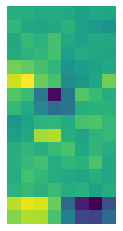

In [5]:
plt.imshow((np.load('C://Science//Data//CapgMyo//3//CapgMyo_607229.npy')+2.5)/5, interpolation='nearest')
plt.axis('off')
plt.show()

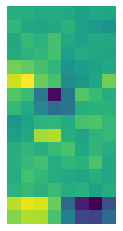

In [6]:
plt.imshow(np.load('C://Science//Data//CapgMyo//3//CapgMyo_607229.npy'), interpolation='nearest')
plt.axis('off')
plt.show()

In [2]:
CapgMyoDF = pd.read_csv(os.path.join('..', '..', 'Data', 'CapgMyo', 'CapgMyo.csv'))
CapgMyoDF

,path,label
0,C:\Science\Data\CapgMyo\0\CapgMyo_0.npy,1
1,C:\Science\Data\CapgMyo\0\CapgMyo_1.npy,1
2,C:\Science\Data\CapgMyo\0\CapgMyo_2.npy,1
3,C:\Science\Data\CapgMyo\0\CapgMyo_3.npy,1
4,C:\Science\Data\CapgMyo\0\CapgMyo_4.npy,1
...,...,...
1439995,C:\Science\Data\CapgMyo\7\CapgMyo_1439995.npy,8
1439996,C:\Science\Data\CapgMyo\7\CapgMyo_1439996.npy,8
1439997,C:\Science\Data\CapgMyo\7\CapgMyo_1439997.npy,8
1439998,C:\Science\Data\CapgMyo\7\CapgMyo_1439998.npy,8


In [3]:
CapgMyoDF['label'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [5]:
CapgMyoDF.iloc[CapgMyoDF.sample(100).index]

,path,label
296859,..\..\Data\CapgMyo\CapgMyo_296859.npy,2
209517,..\..\Data\CapgMyo\CapgMyo_209517.npy,7
1215598,..\..\Data\CapgMyo\CapgMyo_1215598.npy,3
1004415,..\..\Data\CapgMyo\CapgMyo_1004415.npy,3
835953,..\..\Data\CapgMyo\CapgMyo_835953.npy,7
...,...,...
142536,..\..\Data\CapgMyo\CapgMyo_142536.npy,1
1080811,..\..\Data\CapgMyo\CapgMyo_1080811.npy,4
305828,..\..\Data\CapgMyo\CapgMyo_305828.npy,3
490690,..\..\Data\CapgMyo\CapgMyo_490690.npy,1


In [33]:
CapgMyoDF.iloc[~CapgMyoDF.index.isin(CapgMyoDF.sample(1000000).index)].sample(10).index

Int64Index([229519, 788041, 392379, 1231771, 136826, 134387, 351947, 825005,
            338391, 926705],
           dtype='int64')

In [15]:
CapgMyoDF['label'].value_counts()

1    180000
2    180000
3    180000
4    180000
5    180000
6    180000
7    180000
Name: label, dtype: int64

In [7]:
CapgMyoDF.drop('Unnamed: 0', inplace=True, axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [8]:
CapgMyoDF.to_csv(os.path.join('..', '..', 'Data', 'CapgMyo', 'CapgMyo.csv'), index=False)

In [13]:
torch.from_numpy(np.load(CapgMyoDF.paths[1000000]))

tensor([[-8.5561e-03, -5.7104e-03, -6.8789e-03, -3.5183e-03,  2.2726e-03,
         -1.8738e-03,  4.5355e-03,  5.8379e-03],
        [-2.0576e-03, -2.6699e-02, -2.7657e-02, -1.0247e-02,  7.7434e-03,
         -1.9768e-03, -8.4650e-03,  4.3372e-03],
        [-3.1970e-03,  4.5289e-03,  1.2535e-03,  7.6332e-03, -6.2416e-03,
         -7.0039e-03, -7.7303e-04, -2.8595e-03],
        [-2.0505e-03, -1.0907e-03, -1.0163e-03,  8.0581e-03, -6.7409e-03,
          5.2024e-04, -2.0970e-03, -2.8353e-03],
        [-6.8206e-03, -1.2987e-02, -7.8522e-03,  2.0743e-03,  6.3714e-03,
          6.4874e-03,  8.4902e-03, -1.3745e-05],
        [-9.9149e-03, -6.7347e-03, -1.9878e-02,  5.5136e-03, -2.4017e-03,
          4.6353e-03,  1.0339e-02,  3.5195e-02],
        [-4.8477e-03,  3.6322e-03, -1.8751e-03,  8.4397e-03,  1.4810e-02,
          8.8719e-03,  5.3352e-03, -5.3305e-03],
        [-7.0676e-03, -6.7991e-03, -1.2337e-03,  3.9026e-03,  5.8881e-03,
          1.4885e-02,  1.8602e-03,  2.4679e-03],
        [-1.0264

In [2]:
dataset = None

In [3]:
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)
dataloader

In [4]:
dataset.__len__()

1260000

In [5]:
dataiter = iter(dataloader)
features, labels = dataiter.next()
print(features, labels)

tensor([[[ 1.9777e-03, -5.6995e-04,  1.3944e-02,  1.9737e-02,  4.4204e-02,
           1.5919e-02, -6.1627e-03, -1.5769e-02],
         [ 1.2028e-03,  4.8578e-03,  1.0125e-03,  4.5997e-03,  1.2048e-02,
           4.7248e-03, -1.4377e-02, -6.1463e-03],
         [-2.6746e-02, -3.2995e-02, -2.0572e-02, -2.8428e-03,  7.1068e-03,
           3.9167e-03,  6.9383e-03,  1.6852e-03],
         [-5.1041e-02, -8.6579e-02, -3.9627e-02,  3.4812e-03,  1.6935e-02,
           2.3156e-02,  1.2301e-02,  3.0250e-02],
         [-9.1672e-03,  2.8070e-03, -1.2672e-02, -9.2334e-03,  6.2498e-03,
          -4.2990e-04,  3.6616e-04,  1.9626e-02],
         [ 2.3780e-02,  2.5439e-03,  4.5372e-03, -2.0059e-02, -1.0506e-02,
           2.2689e-03, -1.2070e-02, -6.8988e-03],
         [ 1.1769e-02,  1.7242e-02,  1.1135e-02,  1.0306e-02,  3.5419e-03,
           2.1285e-03,  2.6197e-03, -5.0089e-04],
         [ 7.3170e-03,  1.1158e-02,  1.6333e-02,  1.3168e-02,  8.4582e-03,
           3.5078e-03,  3.0725e-03,  1.7908e-03],


In [4]:
AbstractDataModule(os.path.join('..', '..', 'Data', 'CapgMyo', 'CapgMyo.csv'))

In [2]:
capten = get_capgmyo_tensor()

RuntimeError: The expanded size of the tensor (0) must match the existing size (1000) at non-singleton dimension 0.  Target sizes: [0, 16, 8].  Tensor sizes: [1000, 16, 8]

In [ ]:
capten[0][400]

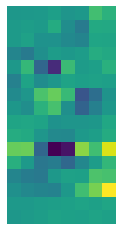

In [3]:
plt.imshow(capten[0][400], interpolation='nearest')
plt.axis('off')
plt.show()

In [2]:
data_frame = get_capgmyo_dataset()
data_frame

,records,labels
0,"[[0.05842395008672874, 0.03897882523526789, -0...",1
1,"[[0.05190974706218046, 0.011920948483512285, 0...",1
2,"[[0.013169703212726636, -0.011579979698558026,...",1
3,"[[-0.004400510770832741, 0.0011526380972148001...",1
4,"[[0.04349718753798314, 0.01520018674440372, -0...",1
...,...,...
1259995,"[[-0.006244014407391028, 0.0002240435889810993...",7
1259996,"[[-0.007085937273800194, 0.0001955566788236509...",7
1259997,"[[-0.006644892514181833, 0.0003949620863952353...",7
1259998,"[[-0.007414133930325232, -0.001094886074140485...",7


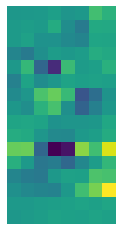

In [3]:
plt.imshow(data_frame.records[400], interpolation='nearest')
plt.axis('off')
plt.show()

In [4]:
data_frame.to_csv('test.csv', index=False)

In [12]:
pd.read_csv('test.csv', skiprows=1000, engine='c', header=None)

KeyboardInterrupt: 

In [3]:
cslten = get_csl_tensor()

In [3]:
cslten

(tensor([[[-6.1037e-05,  9.1556e-05, -1.2207e-04,  ...,  1.5259e-04,
            2.4415e-04, -2.1363e-04],
          [ 3.0519e-05,  9.1556e-05, -3.0519e-05,  ...,  1.5259e-04,
            3.0519e-05,  0.0000e+00],
          [ 1.5259e-04, -2.1363e-04, -6.1037e-05,  ...,  1.5259e-04,
            1.8311e-04, -2.7467e-04],
          ...,
          [ 1.5259e-04,  3.3570e-04, -3.0519e-04,  ...,  6.1037e-05,
           -1.2207e-04,  6.1037e-04],
          [ 3.0519e-05, -9.1556e-05,  6.1037e-05,  ...,  9.1556e-05,
           -9.1556e-05,  2.1363e-04],
          [ 3.0519e-05, -1.8311e-04,  2.7467e-04,  ..., -6.1037e-05,
            1.2207e-04,  3.0519e-05]],
 
         [[-3.0519e-05,  6.1037e-05, -6.1037e-05,  ...,  1.8311e-04,
            3.0519e-04, -1.2207e-04],
          [ 9.1556e-05,  3.0519e-05,  1.5259e-04,  ...,  6.1037e-05,
            6.1037e-05,  0.0000e+00],
          [-3.0519e-05, -9.1556e-05, -2.4415e-04,  ...,  9.1556e-05,
            9.1556e-05, -1.5259e-04],
          ...,
    

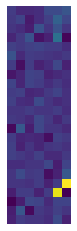

In [4]:
plt.imshow(cslten[0][400], interpolation='nearest')
plt.axis('off')
plt.show()

In [2]:
data_frame_2 = get_csl_dataset()
data_frame_2

,records,labels
0,"[[-6.103701895199438e-05, 9.155552842799158e-0...",0
1,"[[-3.051850947599719e-05, 6.103701895199438e-0...",0
2,"[[-0.00012207403790398877, 0.00012207403790398...",0
3,"[[-9.155552842799158e-05, 6.103701895199438e-0...",0
4,"[[0.0, 9.155552842799158e-05, -0.0002746665852...",0
...,...,...
44531707,"[[6.103701895199438e-05, 6.103701895199438e-05...",26
44531708,"[[0.0, 3.051850947599719e-05, 3.05185094759971...",26
44531709,"[[3.051850947599719e-05, 0.0, 0.0, 6.103701895...",26
44531710,"[[-6.103701895199438e-05, 6.103701895199438e-0...",26


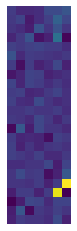

In [3]:
plt.imshow(data_frame_2.records[400], interpolation='nearest')
plt.axis('off')
plt.show()

In [4]:
data_frame_3 = get_ninapro_dataset()
data_frame_3

,records,labels
0,"[0.0684, 0.0024, 0.0024, 0.0024, 0.0024, 0.009...",0
1,"[0.0586, 0.0024, 0.0024, 0.0024, 0.0024, 0.004...",0
2,"[0.0562, 0.0024, 0.0024, 0.0024, 0.0024, 0.004...",0
3,"[0.0562, 0.0024, 0.0024, 0.0024, 0.0024, 0.004...",0
4,"[0.0488, 0.0024, 0.0024, 0.0024, 0.0024, 0.002...",0
...,...,...
12553606,"[0.7007, 0.0049, 0.0049, 0.0049, 0.0049, 0.004...",0
12553607,"[0.6567, 0.0024, 0.0049, 0.0049, 0.0049, 0.002...",0
12553608,"[0.6079, 0.0049, 0.0024, 0.0049, 0.0049, 0.002...",0
12553609,"[0.5908, 0.0049, 0.0024, 0.0049, 0.0024, 0.002...",0


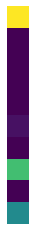

In [7]:
plt.imshow(data_frame_3.records[1].reshape(10,-1), interpolation='nearest')
plt.axis('off')
plt.show()